# Imports

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

## Chargement du dataset complet

In [56]:
df = pd.read_excel('./Complete data/final.xls')

## Affichage du dataset

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Annee                                         8 non-null      int64  
 1   T1_Lutte_ouvriere                             8 non-null      float64
 2   T1_NPA                                        5 non-null      float64
 3   T1_La_france_insoumise                        3 non-null      float64
 4   T1_parti_communiste                           6 non-null      float64
 5   T1_Parti_de_gauche                            2 non-null      float64
 6   T1_EELV                                       7 non-null      float64
 7   T1_MoDem                                      5 non-null      float64
 8   T1_Cap21                                      1 non-null      float64
 9   T1_Parti_socialiste                           8 non-null      float64

## Nettoyage du dataset

In [58]:
# Suppression des partis politiques qui n'existent plus en 2024 ou qui ne se sont pas présentés au premier tour des élections présidentielles de 2022
df2022 = df.drop(columns=['T1_Parti_de_gauche', 'T1_MoDem', 'T1_Cap21', 'T1_Parti_socialiste_unifie', 'T1_Solidarite_et_progres', 'T1_Parti_des_travailleurs__PT', 'T1_RPR', 'T1_Mouvement_pour_la_France', 'T1_Chasse__peche__nature_et_traditions__CPNT'])
print(df2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annee                          8 non-null      int64  
 1   T1_Lutte_ouvriere              8 non-null      float64
 2   T1_NPA                         5 non-null      float64
 3   T1_La_france_insoumise         3 non-null      float64
 4   T1_parti_communiste            6 non-null      float64
 5   T1_EELV                        7 non-null      float64
 6   T1_Parti_socialiste            8 non-null      float64
 7   T1_Les_Republicains__LR        8 non-null      float64
 8   T1_Reconquete                  1 non-null      float64
 9   T1_La_Republique_en_marche     2 non-null      float64
 10  T1_Debout_la_france            2 non-null      float64
 11  T1_Rassemblement_national__RN  7 non-null      float64
 12  T1_Resistons                   2 non-null      float64

In [59]:
df2022 = df2022.fillna(0)
df2022.head()

Annee  T1_Lutte_ouvriere  T1_NPA  T1_La_france_insoumise  \
0   2022              0.660   1.010                   20.65   
1   2017              0.710   1.350                   19.28   
2   2012              0.640   1.350                   11.01   
3   2007              1.275   4.725                    0.00   
4   2002              6.375   5.525                    0.00   

   T1_parti_communiste  T1_EELV  T1_Parti_socialiste  T1_Les_Republicains__LR  \
0                2.590    6.190                 2.21                     4.70   
1                0.000    0.000                 9.04                    19.04   
2                0.000    2.450                31.74                    21.34   
3                1.650    1.950                28.15                    27.75   
4                3.125    6.425                18.10                    21.55   

   T1_Reconquete  T1_La_Republique_en_marche  ...  taux_emploi_F_15_24_ans  \
0           4.91                       32.79  ...                     39.9   
1           0.00                       29.05  ...                     34.8   
2           0.00                        0.00  ...                     35.0   
3           0.00                        0.00  ...                     35.9   
4           0.00                        0.00  ...                     34.1   

   taux_emploi_F_25_49_ans  taux_emploi_F_50_64_ans  taux_emploi_F_15_64_ans  \
0                     84.2                     67.7                     70.7   
1                     84.0                     64.8                     69.2   
2                     84.3                     58.6                     67.6   
3                     83.7                     54.2                     66.3   
4                     82.2                     50.1                     64.5   

   taux_emploi_F_65_69_ans  taux_emploi_H_15_24_ans  taux_emploi_H_25_49_ans  \
0                      8.7                     44.5                     92.7   
1                      6.9                     41.4                     92.7   
2                      5.9                     41.8                     93.4   
3                      2.9                     42.8                     94.4   
4                      2.5                     42.2                     94.3   

   taux_emploi_H_50_64_ans  taux_emploi_H_15_64_ans  taux_emploi_H_65_69_ans  
0                     71.9                     76.6                     12.3  
1                     69.0                     75.8                      8.0  
2                     65.1                     75.3                      6.9  
3                     59.9                     74.7                      4.1  
4                     61.4                     75.4                      3.7  

[5 rows x 48 columns]

In [60]:
# Résultats des premiers tours seulement
dfT1 = df2022.drop(columns=['T2_PS',	'T2_RPR',	'T2_udf',	'T2_En_marche',	'T2_UMP', 'T2_Rassemblement_nationale'])
dfT1.info()
dfT1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annee                          8 non-null      int64  
 1   T1_Lutte_ouvriere              8 non-null      float64
 2   T1_NPA                         8 non-null      float64
 3   T1_La_france_insoumise         8 non-null      float64
 4   T1_parti_communiste            8 non-null      float64
 5   T1_EELV                        8 non-null      float64
 6   T1_Parti_socialiste            8 non-null      float64
 7   T1_Les_Republicains__LR        8 non-null      float64
 8   T1_Reconquete                  8 non-null      float64
 9   T1_La_Republique_en_marche     8 non-null      float64
 10  T1_Debout_la_france            8 non-null      float64
 11  T1_Rassemblement_national__RN  8 non-null      float64
 12  T1_Resistons                   8 non-null      float64

Annee  T1_Lutte_ouvriere  T1_NPA  T1_La_france_insoumise  \
0   2022              0.660   1.010                   20.65   
1   2017              0.710   1.350                   19.28   
2   2012              0.640   1.350                   11.01   
3   2007              1.275   4.725                    0.00   
4   2002              6.375   5.525                    0.00   

   T1_parti_communiste  T1_EELV  T1_Parti_socialiste  T1_Les_Republicains__LR  \
0                2.590    6.190                 2.21                     4.70   
1                0.000    0.000                 9.04                    19.04   
2                0.000    2.450                31.74                    21.34   
3                1.650    1.950                28.15                    27.75   
4                3.125    6.425                18.10                    21.55   

   T1_Reconquete  T1_La_Republique_en_marche  ...  taux_emploi_F_15_24_ans  \
0           4.91                       32.79  ...                     39.9   
1           0.00                       29.05  ...                     34.8   
2           0.00                        0.00  ...                     35.0   
3           0.00                        0.00  ...                     35.9   
4           0.00                        0.00  ...                     34.1   

   taux_emploi_F_25_49_ans  taux_emploi_F_50_64_ans  taux_emploi_F_15_64_ans  \
0                     84.2                     67.7                     70.7   
1                     84.0                     64.8                     69.2   
2                     84.3                     58.6                     67.6   
3                     83.7                     54.2                     66.3   
4                     82.2                     50.1                     64.5   

   taux_emploi_F_65_69_ans  taux_emploi_H_15_24_ans  taux_emploi_H_25_49_ans  \
0                      8.7                     44.5                     92.7   
1                      6.9                     41.4                     92.7   
2                      5.9                     41.8                     93.4   
3                      2.9                     42.8                     94.4   
4                      2.5                     42.2                     94.3   

   taux_emploi_H_50_64_ans  taux_emploi_H_15_64_ans  taux_emploi_H_65_69_ans  
0                     71.9                     76.6                     12.3  
1                     69.0                     75.8                      8.0  
2                     65.1                     75.3                      6.9  
3                     59.9                     74.7                      4.1  
4                     61.4                     75.4                      3.7  

[5 rows x 42 columns]

## Prédictions

### Premier tour

#### Régression linéaire

In [61]:
# # Données caractéristiques
x = df2022[['pop_0_19_ans',	'pop_0_39_ans',	'pop_40_59_ans',	'pop_60_74_ans',	'pop_75_ans',	'pop_total',	'pop_H_0_19_ans',	'pop_H_0_39_ans',	'pop_H_40_59_ans', 'pop_H_60_74_ans',	'pop_H_75_ans',	'pop_total_H',	'pop_F_0_19_ans',	'pop_F_0_39_ans', 'pop_F_40_59_ans',	'pop_F_60_74_ans',	'pop_F_75_ans', 'pop_total_F',	'pib',	'taux_emploi_F_15_24_ans',	'taux_emploi_F_25_49_ans',	'taux_emploi_F_50_64_ans',	'taux_emploi_F_15_64_ans',	'taux_emploi_F_65_69_ans',	'taux_emploi_H_15_24_ans',	'taux_emploi_H_25_49_ans',	'taux_emploi_H_50_64_ans',	'taux_emploi_H_15_64_ans',	'taux_emploi_H_65_69_ans']]

# Données cibles
y = df2022[['T1_Lutte_ouvriere', 'T1_NPA',	'T1_La_france_insoumise',	'T1_parti_communiste',	'T1_EELV',	'T1_Parti_socialiste',	'T1_Les_Republicains__LR',	'T1_Reconquete',	'T1_La_Republique_en_marche', 'T1_Debout_la_france', 'T1_Rassemblement_national__RN', 'T1_Resistons']]

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.4, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(train_data, train_target)

prediction_premier_tour = model.predict(test_data)
print(f"Régression linéaire 0 : {prediction_premier_tour[0]}")
print(f"Régression linéaire 1 : {prediction_premier_tour[1]}")
print(f"Régression linéaire 2 : {prediction_premier_tour[2]}")
print(f"Régression linéaire 3 : {prediction_premier_tour[3]}")

# Calculer le coefficient de détermination (R²) pour évaluer la performance du modèle
r_squared = r2_score(train_target, prediction_premier_tour)
print(f'Coefficient de détermination (R²) : {r_squared*100}')

mae = mean_absolute_error(train_target, prediction_premier_tour)
print(f'Erreur absolue moyenne (MAE) : {mae}')

Régression linéaire 0 : [-3.38498156e+00 -2.86101115e+00  1.98450070e+01 -1.79371940e+00
  1.57773166e-02  4.36124124e+01  1.92465790e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.51094886e+01  0.00000000e+00]
Régression linéaire 1 : [12.57469504  4.85771728  4.89638782  4.37125023 12.38304965  7.32041039
 10.58361838  0.          0.          0.         20.66356019  0.        ]
Régression linéaire 2 : [-4.1157837  -5.74091821 28.34399584 -3.00078012  0.25265337 47.37183027
 14.28637603  0.          0.          0.         19.5726432   0.        ]
Régression linéaire 3 : [-0.83163363 -0.6397743  -5.54572766  5.62305546  1.3197411  45.62681137
 25.33284894  0.          0.          0.          4.30069669  0.        ]
Coefficient de détermination (R²) : -347.3894681886822
Erreur absolue moyenne (MAE) : 4.477558254121628


#### Arbre de décision

In [62]:
# Création et entraînement du modèle
from sklearn.tree import DecisionTreeRegressor

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.4, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(train_data, train_target)

# Prédiction sur l'ensemble de test
prediction_premier_tour = model.predict(test_data)

print(f"Arbre de décision 0 : {prediction_premier_tour[0]}")
print(f"Arbre de décision 1 : {prediction_premier_tour[1]}")
print(f"Arbre de décision 2 : {prediction_premier_tour[2]}")
print(f"Arbre de décision 3 : {prediction_premier_tour[3]}")

# Calculer le coefficient de détermination (R²) pour évaluer la performance du modèle
r_squared_tree = r2_score(train_target, prediction_premier_tour)
print(f'Coefficient de détermination (R²) pour l\'arbre de décision : {r_squared_tree*100}%')

mae = mean_absolute_error(train_target, prediction_premier_tour)
print(f'Erreur absolue moyenne (MAE) : {mae}')

Arbre de décision 0 : [ 0.64  1.35 11.01  0.    2.45 31.74 21.34  0.    0.    0.   13.24  0.  ]
Arbre de décision 1 : [ 6.375  5.525  0.     3.125  6.425 18.1   21.55   0.     0.     0.
 11.975  0.   ]
Arbre de décision 2 : [ 0.64  1.35 11.01  0.    2.45 31.74 21.34  0.    0.    0.   13.24  0.  ]
Arbre de décision 3 : [ 2.35   0.     0.     4.775  4.175 36.65  20.15   0.     0.     0.
  9.925  0.   ]
Coefficient de détermination (R²) pour l'arbre de décision : 57.35152162621603%
Erreur absolue moyenne (MAE) : 0.6903125000000001


#### Random Forest

In [63]:
# Création et entraînement du modèle
from sklearn.ensemble import RandomForestRegressor

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.4, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(train_data, train_target)

prediction_premier_tour = model.predict(test_data)
print(f"Random forest 0 : {prediction_premier_tour[0]}")
print(f"Random forest 1 : {prediction_premier_tour[1]}")
print(f"Random forest 2 : {prediction_premier_tour[2]}")
print(f"Random forest 3 : {prediction_premier_tour[3]}")

# Calculer le coefficient de détermination (R²) pour évaluer la performance du modèle
r_squared_rf = r2_score(train_target, prediction_premier_tour)
print(f'Coefficient de détermination (R²) pour le Random Forest : {r_squared_rf}')

mae = mean_absolute_error(train_target, prediction_premier_tour)
print(f'Erreur absolue moyenne (MAE) : {mae}')

Random forest 0 : [ 1.45324  2.3728   7.11246  0.90625  2.85855 29.88294 22.55394  0.
  0.       0.      11.76029  0.     ]
Random forest 1 : [ 3.62171  3.45755  0.92484  2.98785  4.45425 26.67396 22.54436  0.
  0.       0.      10.44916  0.     ]
Random forest 2 : [ 1.47236  2.4686   5.87934  1.2336   2.8287  30.17796 22.98266  0.
  0.       0.      11.13721  0.     ]
Random forest 3 : [ 2.31882  2.0279   2.51028  2.83325  3.66065 31.21342 22.12492  0.
  0.       0.      10.44722  0.     ]
Coefficient de détermination (R²) pour le Random Forest : 0.5897787884380735
Erreur absolue moyenne (MAE) : 1.370658749999999


Au terme de nos prédictions, il semble que le Parti Socialiste et Les Républicains soient en tête, grâce à leurs scores précédents.

### Second tour

In [64]:
# Résultats des second tours seulement
dfT2 = df2022.drop(columns=['T1_Lutte_ouvriere', 'T1_NPA',	'T1_La_france_insoumise',	'T1_parti_communiste',	'T1_EELV',	'T1_Parti_socialiste',	'T1_Les_Republicains__LR',	'T1_Reconquete',	'T1_La_Republique_en_marche', 'T1_Debout_la_france', 'T1_Rassemblement_national__RN', 'T1_Resistons'])
dfT2.info()
dfT2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Annee                       8 non-null      int64  
 1   T2_PS                       8 non-null      float64
 2   T2_RPR                      8 non-null      float64
 3   T2_udf                      8 non-null      float64
 4   T2_En_marche                8 non-null      float64
 5   T2_UMP                      8 non-null      float64
 6   T2_Rassemblement_nationale  8 non-null      float64
 7   pop_0_19_ans                8 non-null      int64  
 8   pop_0_39_ans                8 non-null      int64  
 9   pop_40_59_ans               8 non-null      int64  
 10  pop_60_74_ans               8 non-null      int64  
 11  pop_75_ans                  8 non-null      int64  
 12  pop_total                   8 non-null      int64  
 13  pop_H_0_19_ans              8 non-null 

Annee  T2_PS  T2_RPR  T2_udf  T2_En_marche  T2_UMP  \
0   2022   0.00    0.00     0.0         66.58    0.00   
1   2017   0.00    0.00     0.0         75.36    0.00   
2   2012  56.35    0.00     0.0          0.00   43.65   
3   2007  52.62    0.00     0.0          0.00   47.38   
4   2002   0.00   88.46     0.0          0.00    0.00   

   T2_Rassemblement_nationale  pop_0_19_ans  pop_0_39_ans  pop_40_59_ans  ...  \
0                       33.42      16066874      15885696       17444746  ...   
1                       24.64      16316348      15916960       17595815  ...   
2                        0.00      15457656      16296152       17594927  ...   
3                        0.00      15924796      16668846       17504980  ...   
4                       11.44      15679605      16939796       16250559  ...   

   taux_emploi_F_15_24_ans  taux_emploi_F_25_49_ans  taux_emploi_F_50_64_ans  \
0                     39.9                     84.2                     67.7   
1                     34.8                     84.0                     64.8   
2                     35.0                     84.3                     58.6   
3                     35.9                     83.7                     54.2   
4                     34.1                     82.2                     50.1   

   taux_emploi_F_15_64_ans  taux_emploi_F_65_69_ans  taux_emploi_H_15_24_ans  \
0                     70.7                      8.7                     44.5   
1                     69.2                      6.9                     41.4   
2                     67.6                      5.9                     41.8   
3                     66.3                      2.9                     42.8   
4                     64.5                      2.5                     42.2   

   taux_emploi_H_25_49_ans  taux_emploi_H_50_64_ans  taux_emploi_H_15_64_ans  \
0                     92.7                     71.9                     76.6   
1                     92.7                     69.0                     75.8   
2                     93.4                     65.1                     75.3   
3                     94.4                     59.9                     74.7   
4                     94.3                     61.4                     75.4   

   taux_emploi_H_65_69_ans  
0                     12.3  
1                      8.0  
2                      6.9  
3                      4.1  
4                      3.7  

[5 rows x 36 columns]

#### Régression linéaire

In [65]:
# # Données caractéristiques
x = df2022[['pop_0_19_ans',	'pop_0_39_ans',	'pop_40_59_ans',	'pop_60_74_ans',	'pop_75_ans',	'pop_total',	'pop_H_0_19_ans',	'pop_H_0_39_ans',	'pop_H_40_59_ans', 'pop_H_60_74_ans',	'pop_H_75_ans',	'pop_total_H',	'pop_F_0_19_ans',	'pop_F_0_39_ans', 'pop_F_40_59_ans',	'pop_F_60_74_ans',	'pop_F_75_ans', 'pop_total_F',	'pib',	'taux_emploi_F_15_24_ans',	'taux_emploi_F_25_49_ans',	'taux_emploi_F_50_64_ans',	'taux_emploi_F_15_64_ans',	'taux_emploi_F_65_69_ans',	'taux_emploi_H_15_24_ans',	'taux_emploi_H_25_49_ans',	'taux_emploi_H_50_64_ans',	'taux_emploi_H_15_64_ans',	'taux_emploi_H_65_69_ans']]

# Données cibles
# UMP est l'ancien nom du parti Les Républicains
y = df2022[['T2_PS', 'T2_UMP']]

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.4, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(train_data, train_target)

prediction_second_tour = model.predict(test_data)
print(f"Régression linéaire 0 : {prediction_second_tour[0]}")
print(f"Régression linéaire 1 : {prediction_second_tour[1]}")
print(f"Régression linéaire 2 : {prediction_second_tour[2]}")
print(f"Régression linéaire 3 : {prediction_second_tour[3]}")

# Calculer le coefficient de détermination (R²) pour évaluer la performance du modèle
r_squared = r2_score(train_target, prediction_second_tour)
print(f'Coefficient de détermination (R²) : {r_squared*100}')

mae = mean_absolute_error(train_target, prediction_second_tour)
print(f'Erreur absolue moyenne (MAE) : {mae}')

Régression linéaire 0 : [98.24255    66.04683365]
Régression linéaire 1 : [-64.71509479 -63.27817641]
Régression linéaire 2 : [104.25907394  63.59288065]
Régression linéaire 3 : [94.24557222 20.72669113]
Coefficient de détermination (R²) : -250.60268098840558
Erreur absolue moyenne (MAE) : 40.00710909812028


#### Arbre de décision

In [66]:
# Création et entraînement du modèle
from sklearn.tree import DecisionTreeRegressor

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.4, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(train_data, train_target)

# Prédiction sur l'ensemble de test
prediction_second_tour = model.predict(test_data)

print(f"Arbre de décision 0 : {prediction_second_tour[0]}")
print(f"Arbre de décision 1 : {prediction_second_tour[1]}")
print(f"Arbre de décision 2 : {prediction_second_tour[2]}")
print(f"Arbre de décision 3 : {prediction_second_tour[3]}")

# Calculer le coefficient de détermination (R²) pour évaluer la performance du modèle
r_squared_tree = r2_score(train_target, prediction_second_tour)
print(f'Coefficient de détermination (R²) pour l\'arbre de décision : {r_squared_tree*100}%')

mae = mean_absolute_error(train_target, prediction_second_tour)
print(f'Erreur absolue moyenne (MAE) : {mae}')

Arbre de décision 0 : [56.35 43.65]
Arbre de décision 1 : [0. 0.]
Arbre de décision 2 : [55.05  0.  ]
Arbre de décision 3 : [55.05  0.  ]
Coefficient de détermination (R²) pour l'arbre de décision : 45.86855636337386%
Erreur absolue moyenne (MAE) : 6.22625


#### Random Forest

In [67]:
# Création et entraînement du modèle
from sklearn.ensemble import RandomForestRegressor

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.4, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(train_data, train_target)

prediction_second_tour = model.predict(test_data)
print(f"Random forest 0 : {prediction_second_tour[0]}")
print(f"Random forest 1 : {prediction_second_tour[1]}")
print(f"Random forest 2 : {prediction_second_tour[2]}")
print(f"Random forest 3 : {prediction_second_tour[3]}")

# Calculer le coefficient de détermination (R²) pour évaluer la performance du modèle
r_squared_rf = r2_score(train_target, prediction_second_tour)
print(f'Coefficient de détermination (R²) pour le Random Forest : {r_squared_rf}')

mae = mean_absolute_error(train_target, prediction_second_tour)
print(f'Erreur absolue moyenne (MAE) : {mae}')

Random forest 0 : [48.94316 36.02044]
Random forest 1 : [32.10078 13.59402]
Random forest 2 : [49.97568 33.72222]
Random forest 3 : [43.66682 16.44508]
Coefficient de détermination (R²) pour le Random Forest : 0.5599731697770252
Erreur absolue moyenne (MAE) : 13.107695000000126


Pour le deuxième tour,  il semblerait que le modèle d'arbre de décision soit le plus pertinent.

### Matrices de corrélation

In [68]:
dfT1HeatMap = dfT1.drop(columns=['pop_0_19_ans',	'pop_0_39_ans',	'pop_40_59_ans',	'pop_60_74_ans',	'pop_75_ans', 'pop_H_0_19_ans',	'pop_H_0_39_ans',	'pop_H_40_59_ans', 'pop_H_60_74_ans',	'pop_H_75_ans', 'pop_F_0_19_ans',	'pop_F_0_39_ans', 'pop_F_40_59_ans',	'pop_F_60_74_ans',	'pop_F_75_ans'])
dfT1HeatMap.info()
dfT2HeatMap = dfT2.drop(columns=['pop_0_19_ans',	'pop_0_39_ans',	'pop_40_59_ans',	'pop_60_74_ans',	'pop_75_ans', 'pop_H_0_19_ans',	'pop_H_0_39_ans',	'pop_H_40_59_ans', 'pop_H_60_74_ans',	'pop_H_75_ans', 'pop_F_0_19_ans',	'pop_F_0_39_ans', 'pop_F_40_59_ans',	'pop_F_60_74_ans',	'pop_F_75_ans'])
dfT2HeatMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annee                          8 non-null      int64  
 1   T1_Lutte_ouvriere              8 non-null      float64
 2   T1_NPA                         8 non-null      float64
 3   T1_La_france_insoumise         8 non-null      float64
 4   T1_parti_communiste            8 non-null      float64
 5   T1_EELV                        8 non-null      float64
 6   T1_Parti_socialiste            8 non-null      float64
 7   T1_Les_Republicains__LR        8 non-null      float64
 8   T1_Reconquete                  8 non-null      float64
 9   T1_La_Republique_en_marche     8 non-null      float64
 10  T1_Debout_la_france            8 non-null      float64
 11  T1_Rassemblement_national__RN  8 non-null      float64
 12  T1_Resistons                   8 non-null      float64

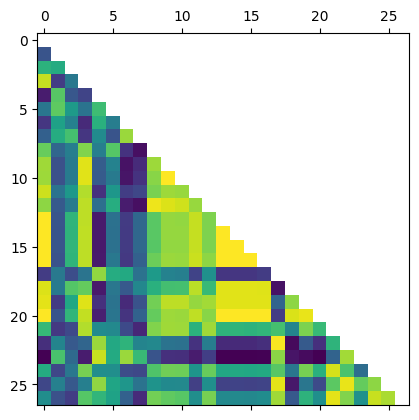

In [72]:
corr = dfT1HeatMap.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))
plt.matshow(corr)
plt.show()

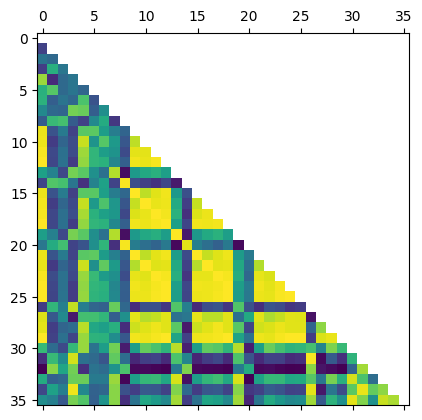

In [70]:
corr = dfT2.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))
plt.matshow(corr)
plt.show()

Il semble que l'évolution de la population soit corrélée aux votes.